In [1]:
!pip install seaborn
!pip install wordcloud

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import collections
sns.set_theme(style="darkgrid")
#import dexplot as dxp
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [3]:
plt.rcParams['figure.dpi'] = 100

In [4]:
os.chdir('/notebooks/Data')
twitter_df = pd.read_csv('Brand_BERT_sentiment.csv')

In [5]:
twitter_df['Datetime'] = pd.to_datetime(twitter_df['Datetime'])

In [6]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16063 entries, 0 to 16062
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   index          16063 non-null  int64              
 1   Datetime       16063 non-null  datetime64[ns, UTC]
 2   Tweet Id       16063 non-null  float64            
 3   Text           16063 non-null  object             
 4   Retweets       16063 non-null  float64            
 5   LikeCount      16063 non-null  float64            
 6   QuoteCount     16063 non-null  float64            
 7   TextClean      16063 non-null  object             
 8   TextCleanLemm  16063 non-null  object             
 9   tb_score       16063 non-null  float64            
 10  afinn_score    16063 non-null  float64            
 11  vader_com      16063 non-null  float64            
 12  vader_pos      16063 non-null  float64            
 13  vader_neg      16063 non-null  float64        

In [7]:
twitter_df_corr = twitter_df[['Datetime', 'Retweets', 'LikeCount', 'QuoteCount', 'tb_score', 'afinn_score', 'vader_com', 'Sentiment', 'wkd_value']]
twitter_df_corr.corr()

,Retweets,LikeCount,QuoteCount,tb_score,afinn_score,vader_com,Sentiment,wkd_value
Retweets,1.000000,0.655905,0.366986,-0.000128,0.003759,-0.002544,0.000444,-0.010438
LikeCount,0.655905,1.000000,0.541050,0.001344,0.008646,-0.003398,-0.003430,-0.006460
QuoteCount,0.366986,0.541050,1.000000,-0.008721,-0.009270,-0.016554,-0.006472,-0.003499
tb_score,-0.000128,0.001344,-0.008721,1.000000,0.580077,0.533625,0.226359,-0.003047
afinn_score,0.003759,0.008646,-0.009270,0.580077,1.000000,0.768798,0.207708,-0.013887
vader_com,-0.002544,-0.003398,-0.016554,0.533625,0.768798,1.000000,0.222224,-0.013470
Sentiment,0.000444,-0.003430,-0.006472,0.226359,0.207708,0.222224,1.000000,-0.015130
wkd_value,-0.010438,-0.006460,-0.003499,-0.003047,-0.013887,-0.013470,-0.015130,1.000000


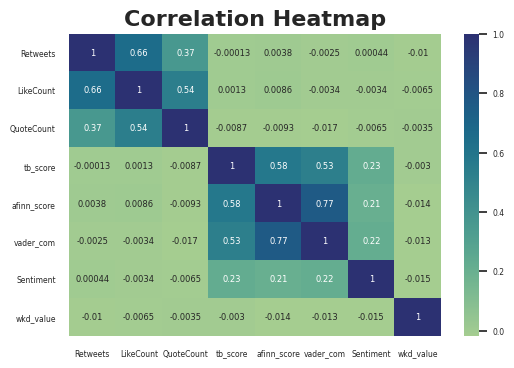

In [8]:
sns.set(font_scale=0.5)
ax = sns.heatmap(twitter_df_corr.corr(), annot=True, cmap='crest')
ax.set_title('Correlation Heatmap', fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.show()

In [9]:
twitter_df.head(3)

,index,Datetime,Tweet Id,Text,Retweets,LikeCount,QuoteCount,TextClean,TextCleanLemm,tb_score,afinn_score,vader_com,vader_pos,vader_neg,vader_neu,Brand,wkd_value,wkd,Sentiment
0,50279,2015-04-27 14:28:55+00:00,5.926969e+17,Check out Yamaha HTR 6250 7.1 Channel 630 Watt...,0.0,0.0,0.0,check yamaha htr channel watt home theater aud...,check yamaha htr channel watt home theater aud...,0.0,0.0,0.0000,0.000,-0.000,1.000,YamahaAudio,0,Mon,1
1,288602,2018-03-16 23:46:26+00:00,9.747940e+17,"We find our limits by pushing them, so why not...",5.0,10.0,0.0,find limits pushing not enter chance win covet...,find limit push not enter chance win covet mil...,0.8,7.0,-0.4238,0.106,-0.256,0.638,Garmin,4,Fri,0
2,11354,2012-08-06 23:42:42+00:00,2.326228e+17,Tripp Lite: eps vector logotype. http://t.co/a...,0.0,0.0,0.0,tripp lite eps vector logotype,tripp lite eps vector logotype,0.0,0.0,0.0000,0.000,-0.000,1.000,TrippLite,0,Mon,1


## Twitter Word Cloud

In [10]:
#create list of words from review
words_in_review = [str(review).split() for review in twitter_df.TextCleanLemm]

In [12]:
#calculate and plot word frequency
# flatten list of words
all_words = [word for words in words_in_review for word in words]

#Create counter
word_count = collections.Counter(all_words)

#create df
df_word_count = pd.DataFrame(word_count.most_common(50),
                             columns=['words', 'count'])

all_words_str = ' '.join(all_words)

df_word_count.head(10)

,words,count
0,audio,5163
1,yamaha,4120
2,apple,1847
3,polk,1719
4,lite,1712
5,tripp,1694
6,belkin,1557
7,sangean,1525
8,garmin,1450
9,receiver,1361


In [13]:
twitter_mask = np.array(Image.open('/notebooks/Data/twitter_mask.png'))

In [14]:
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add('yamaha')
stopwords.add('apple')
stopwords.add('sony')
stopwords.add('tripp')
stopwords.add('lite')
stopwords.add('boss')
stopwords.add('polk')
stopwords.add('belkin')
stopwords.add('garmin')
stopwords.add('sangean')
stopwords.add('pwr')
stopwords.add('p')
stopwords.add('v')
stopwords.add('w')
stopwords.add('rt')
stopwords.add('de')
stopwords.add('u')
stopwords.add('audio')

In [15]:
wc = WordCloud(background_color="white", max_words=2000, mask=twitter_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

In [16]:
wc.generate(all_words_str)

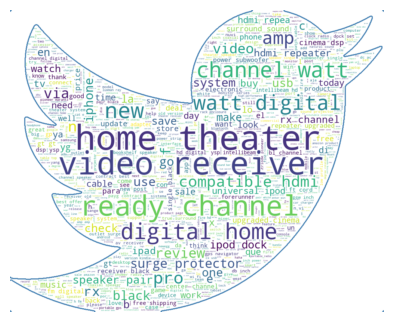

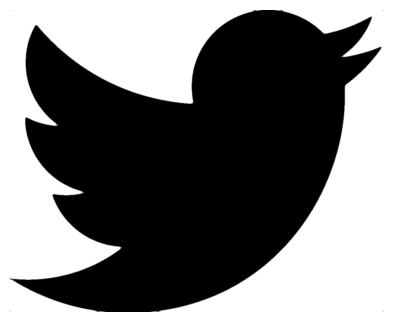

In [17]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(twitter_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
twitter_df.Brand.value_counts(ascending=False)

YamahaAudio    3616
Apple          1767
Sangean        1643
Garmin         1598
Belkin         1569
Pwr+           1568
PolkAudio      1559
TrippLite      1546
Sony           1087
BossAudio       110
Name: Brand, dtype: int64

## News Word Cloud

In [19]:
os.chdir('/notebooks/Data')
news_df = pd.read_csv('All_headlines_sentiment.csv')
news_df.drop(columns=['Unnamed: 0'], inplace=True)

In [20]:
news_df.Brand.value_counts(ascending=False)

sony                  97
belkin                96
apple                 95
garmin                93
sangean               83
boss audio systems    78
polk audio            69
yamaha audio          47
tripp lite            41
pwr+                  31
Name: Brand, dtype: int64

In [21]:
#create list of words from review
words_in_review_2 = [str(review).split() for review in news_df.title_lemm]

In [22]:
all_words = [word for words in words_in_review_2 for word in words]

all_words_str = ' '.join(all_words)

In [23]:
news_mask = np.array(Image.open('/notebooks/Data/book_mask.png'))

In [24]:
wc2 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

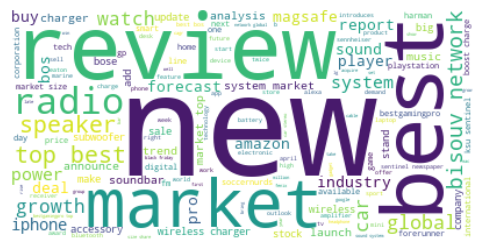

In [25]:
wordcloud = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, contour_width=3, contour_color='steelblue').generate(all_words_str)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

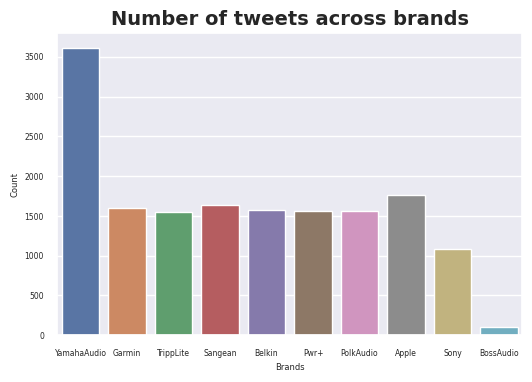

In [29]:
ax = sns.countplot(x='Brand', data=twitter_df)
ax.set_title('Number of tweets across brands', fontdict= { 'fontsize': 14, 'fontweight':'bold'})
ax.set_xlabel('Brands')
ax.set_ylabel('Count')
plt.show()

In [30]:
os.chdir('/notebooks/Data')
brand_BERT_df = pd.read_csv('Brand_BERT_sentiment.csv')

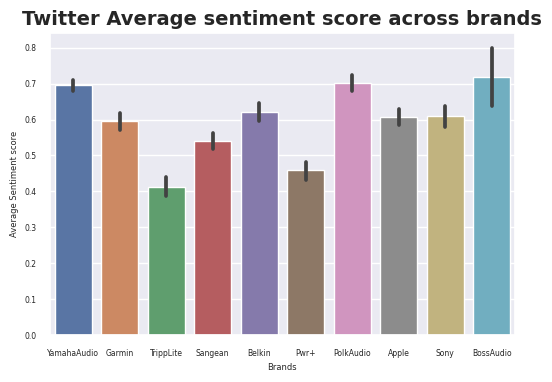

In [36]:
ax = sns.barplot(x='Brand', y='Sentiment', data=brand_BERT_df)
ax.set_title('Twitter Average sentiment score across brands', fontdict= { 'fontsize': 14, 'fontweight':'bold'})
ax.set_xlabel('Brands')
ax.set_ylabel('Average Sentiment score')
plt.show()

In [32]:
os.chdir('/notebooks/Data')
brand_news_df = pd.read_csv('Brand_News_Sentiment.csv')

In [48]:
brand_news_df.head()

,Unnamed: 0,Brand,textblob
0,0,apple,0.130569
1,1,belkin,0.206817
2,2,boss audio,0.307327
3,3,garmin,0.219252
4,4,polk audio,0.166181


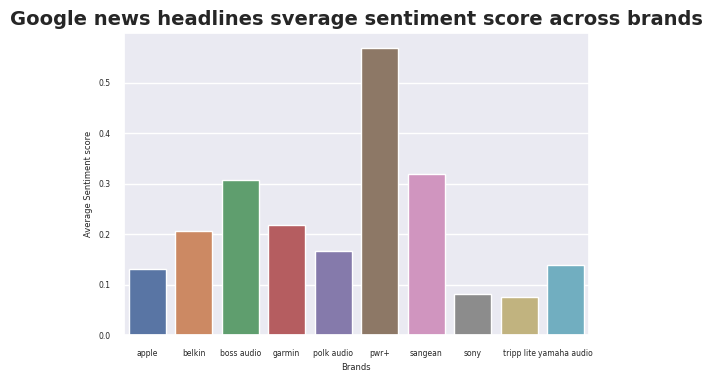

In [50]:
ax = sns.barplot(x='Brand', y='textblob', data=brand_news_df)
ax.set_title('Google news headlines sverage sentiment score across brands', fontdict= { 'fontsize': 14, 'fontweight':'bold'})
ax.set_xlabel('Brands')
ax.set_ylabel('Average Sentiment score')
plt.show()